In [1]:
# Just to know last time this was run:
import time
print(time.ctime())

Mon Jan  4 23:31:06 2021


# J Using PyMySQL to access MySQL databases

## Have a look at the MySQL.pdf presentation.

This package contains a pure-Python MySQL client library. In this sense, it does not need to have access to mysql reader or library, which is the case for the mysqldb package.
The goal of PyMySQL is to be a drop-in replacement for MySQLdb and work on CPython, PyPy, IronPython and Jython.

It is installed with "conda install pymysql" or "pip install pymysql"

We first import the usual libraries

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os

This is the import of the library used to connect to MySQl database

In [3]:
import pymysql

First you need to connect to a database. In our example, we will use the 3MdB database, which needs a password. https://sites.google.com/site/mexicanmillionmodels/

## TIP: DIRECTLY GO TO THE LAST SECTION (USING PANDAS)

### Connect to the database

In [4]:
user_password = os.environ['MdB_PASSWD']  # ask me for the password :-)

In [5]:
# We create a connector to the database
connector = pymysql.connect(host='3mdb.astro.unam.mx', port=3306, user='OVN_user', passwd=user_password, db='3MdB')

### Use a cursor to send query and receive results

In [6]:
# The cursor is used to send and receive the quesries to the databse
cur = connector.cursor()

In [7]:
# Send the query to be executed. It returns the number of lines of the result
cur.execute('select * from `lines` limit 15')

15

In [8]:
# get a description of the columns of the query results
cur.description

(('Nl', 8, None, 20, 20, 0, False),
 ('label', 253, None, 60, 60, 0, True),
 ('id', 253, None, 80, 80, 0, True),
 ('lambda', 5, None, 22, 22, 31, True),
 ('name', 253, None, 160, 160, 0, False),
 ('used', 3, None, 2, 2, 0, True))

In [9]:
# fech all the resulting data into a variable
lines = cur.fetchall()

In [10]:
# close the cursor once used
cur.close()

In [11]:
# the result is in a form of tuple of tuples
print(lines)

((1, 'BAC___3646A', 'Bac ', 3646.0, 'BalmHead', 1), (2, 'COUT__3646A', 'cout', 3646.0, 'OutwardBalmPeak', 1), (3, 'CREF__3646A', 'cref', 3646.0, 'ReflectedBalmPeak', 1), (4, 'H__1__4861A', 'H  1', 4861.0, 'H I 4861', 1), (5, 'TOTL__4861A', 'TOTL', 4861.0, 'H I 4861', 1), (6, 'H__1__6563A', 'H  1', 6563.0, 'H I 6563', 1), (7, 'H__1__4340A', 'H  1', 4340.0, 'H I 4340', 1), (8, 'H__1__4102A', 'H  1', 4102.0, 'H I 4102', 1), (9, 'H__1__3970A', 'H  1', 3970.0, 'H I 3970', 1), (10, 'H__1__3835A', 'H  1', 3835.0, 'H I 3835', 1), (11, 'H__1__1216A', 'H  1', 1216.0, 'H I 1216', 1), (12, 'H__1_4051M', 'H  1', 4.051, 'H I 4.051m', 1), (13, 'H__1_2625M', 'H  1', 2.625, 'H I 2.625m', 1), (14, 'H__1_7458M', 'H  1', 7.458, 'H I 7.458m', 1), (15, 'HE_1__5876A', 'He 1', 5876.0, 'He I 5876', 1))


In [12]:
# Each element of the first level tuple is a tuple corresponding to a row of the query results
print(len(lines))
print(lines[0])

15
(1, 'BAC___3646A', 'Bac ', 3646.0, 'BalmHead', 1)


### Using a cursor that returns a dictionary

In [13]:
cur_dic = connector.cursor(pymysql.cursors.DictCursor)

In [14]:
cur_dic.execute('select * from `lines` limit 15')

15

In [15]:
lines_dic = cur_dic.fetchall()

In [16]:
print(lines_dic)

[{'Nl': 1, 'label': 'BAC___3646A', 'id': 'Bac ', 'lambda': 3646.0, 'name': 'BalmHead', 'used': 1}, {'Nl': 2, 'label': 'COUT__3646A', 'id': 'cout', 'lambda': 3646.0, 'name': 'OutwardBalmPeak', 'used': 1}, {'Nl': 3, 'label': 'CREF__3646A', 'id': 'cref', 'lambda': 3646.0, 'name': 'ReflectedBalmPeak', 'used': 1}, {'Nl': 4, 'label': 'H__1__4861A', 'id': 'H  1', 'lambda': 4861.0, 'name': 'H I 4861', 'used': 1}, {'Nl': 5, 'label': 'TOTL__4861A', 'id': 'TOTL', 'lambda': 4861.0, 'name': 'H I 4861', 'used': 1}, {'Nl': 6, 'label': 'H__1__6563A', 'id': 'H  1', 'lambda': 6563.0, 'name': 'H I 6563', 'used': 1}, {'Nl': 7, 'label': 'H__1__4340A', 'id': 'H  1', 'lambda': 4340.0, 'name': 'H I 4340', 'used': 1}, {'Nl': 8, 'label': 'H__1__4102A', 'id': 'H  1', 'lambda': 4102.0, 'name': 'H I 4102', 'used': 1}, {'Nl': 9, 'label': 'H__1__3970A', 'id': 'H  1', 'lambda': 3970.0, 'name': 'H I 3970', 'used': 1}, {'Nl': 10, 'label': 'H__1__3835A', 'id': 'H  1', 'lambda': 3835.0, 'name': 'H I 3835', 'used': 1}, {'

In [17]:
# Each element of the table is a dictionary corresponding to a row od the query results
print(lines_dic[0])

{'Nl': 1, 'label': 'BAC___3646A', 'id': 'Bac ', 'lambda': 3646.0, 'name': 'BalmHead', 'used': 1}


In [18]:
# One can easily create a new dictionary than hold the data in columns, better for plotting.
new_dic = {k:np.array([d[k] for d in lines_dic]) for k in lines_dic[0].keys()}

In [19]:
# The names of the columns are the names use in the database
new_dic['lambda']

array([3.646e+03, 3.646e+03, 3.646e+03, 4.861e+03, 4.861e+03, 6.563e+03,
       4.340e+03, 4.102e+03, 3.970e+03, 3.835e+03, 1.216e+03, 4.051e+00,
       2.625e+00, 7.458e+00, 5.876e+03])

In [20]:
# One can also transform the results into a numpy recarray.
# First step: create a table from the dictionnary
lines_tab = [list(e.values()) for e in lines_dic]
lines_tab

[[1, 'BAC___3646A', 'Bac ', 3646.0, 'BalmHead', 1],
 [2, 'COUT__3646A', 'cout', 3646.0, 'OutwardBalmPeak', 1],
 [3, 'CREF__3646A', 'cref', 3646.0, 'ReflectedBalmPeak', 1],
 [4, 'H__1__4861A', 'H  1', 4861.0, 'H I 4861', 1],
 [5, 'TOTL__4861A', 'TOTL', 4861.0, 'H I 4861', 1],
 [6, 'H__1__6563A', 'H  1', 6563.0, 'H I 6563', 1],
 [7, 'H__1__4340A', 'H  1', 4340.0, 'H I 4340', 1],
 [8, 'H__1__4102A', 'H  1', 4102.0, 'H I 4102', 1],
 [9, 'H__1__3970A', 'H  1', 3970.0, 'H I 3970', 1],
 [10, 'H__1__3835A', 'H  1', 3835.0, 'H I 3835', 1],
 [11, 'H__1__1216A', 'H  1', 1216.0, 'H I 1216', 1],
 [12, 'H__1_4051M', 'H  1', 4.051, 'H I 4.051m', 1],
 [13, 'H__1_2625M', 'H  1', 2.625, 'H I 2.625m', 1],
 [14, 'H__1_7458M', 'H  1', 7.458, 'H I 7.458m', 1],
 [15, 'HE_1__5876A', 'He 1', 5876.0, 'He I 5876', 1]]

In [21]:
# Second step: transform the table into a numpy recarray, using the names from the dictionnary
names = list(lines_dic[0].keys())
res = np.rec.fromrecords(lines_tab, names = names)

In [22]:
res

rec.array([( 1, 'BAC___3646A', 'Bac ', 3.646e+03, 'BalmHead', 1),
           ( 2, 'COUT__3646A', 'cout', 3.646e+03, 'OutwardBalmPeak', 1),
           ( 3, 'CREF__3646A', 'cref', 3.646e+03, 'ReflectedBalmPeak', 1),
           ( 4, 'H__1__4861A', 'H  1', 4.861e+03, 'H I 4861', 1),
           ( 5, 'TOTL__4861A', 'TOTL', 4.861e+03, 'H I 4861', 1),
           ( 6, 'H__1__6563A', 'H  1', 6.563e+03, 'H I 6563', 1),
           ( 7, 'H__1__4340A', 'H  1', 4.340e+03, 'H I 4340', 1),
           ( 8, 'H__1__4102A', 'H  1', 4.102e+03, 'H I 4102', 1),
           ( 9, 'H__1__3970A', 'H  1', 3.970e+03, 'H I 3970', 1),
           (10, 'H__1__3835A', 'H  1', 3.835e+03, 'H I 3835', 1),
           (11, 'H__1__1216A', 'H  1', 1.216e+03, 'H I 1216', 1),
           (12, 'H__1_4051M', 'H  1', 4.051e+00, 'H I 4.051m', 1),
           (13, 'H__1_2625M', 'H  1', 2.625e+00, 'H I 2.625m', 1),
           (14, 'H__1_7458M', 'H  1', 7.458e+00, 'H I 7.458m', 1),
           (15, 'HE_1__5876A', 'He 1', 5.876e+03, 'He I 5

In [23]:
res['lambda']

array([3.646e+03, 3.646e+03, 3.646e+03, 4.861e+03, 4.861e+03, 6.563e+03,
       4.340e+03, 4.102e+03, 3.970e+03, 3.835e+03, 1.216e+03, 4.051e+00,
       2.625e+00, 7.458e+00, 5.876e+03])

### Example of plotting the result of a query

In [24]:
# Send the query
N = cur_dic.execute('select O__3__5007A, N__2__6584A, H__1__6563A, oxygen from tab where ref = "HII_CHIm"')

In [25]:
print(N)

7854


In [26]:
# obtain the results as a dictionnary
res = cur_dic.fetchall()

In [27]:
# transform the dictionary into a recarray
data = np.rec.fromrecords([list(e.values()) for e in res], names = list(res[0].keys()))

In [28]:
# check the data
data[0]

(1.13306244e+58, 3.15741653e+58, 8.46594309e+58, -3.1)

In [29]:
data['O__3__5007A']

array([1.13306244e+58, 3.42011987e+59, 1.99193171e+55, ...,
       1.75269191e+60, 1.37202885e+60, 1.52244148e+60])

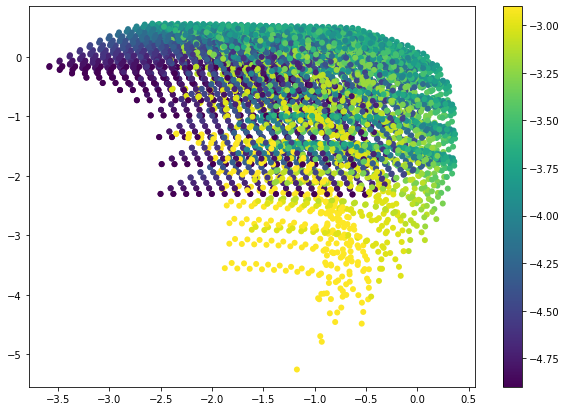

In [30]:
# Plot the results, using a column as color code
fig, ax = plt.subplots(figsize=(10,7))
scat = ax.scatter(np.log10(data['N__2__6584A'] / data['H__1__6563A']), np.log10(data['O__3__5007A'] / data['H__1__6563A']), 
            c=data['oxygen'], edgecolor='none')
fig.colorbar(scat);

In [31]:
# Disconnect cursor and connector
cur_dic.close()
connector.close()

### Using pandas library

In [32]:
import pandas as pd 
import pymysql 
import matplotlib.pyplot as plt

user_password = os.environ['MdB_PASSWD'] # ask me for the password :-)
co = pymysql.connect(host='3mdb.astro.unam.mx', db='3MdB', user='OVN_user', passwd=user_password) # change for the right  passwd, just ask me for them!!! 

In [33]:
res = pd.read_sql("""
SELECT log10(N__2__6584A/H__1__6563A) as n2, 
    log10(O__3__5007A/H__1__4861A) as o3, 
    OXYGEN as O 
FROM tab 
WHERE ref = 'DIG_HR'""", 
                  con=co) 
co.close() 

In [34]:
print(len(res))

41327


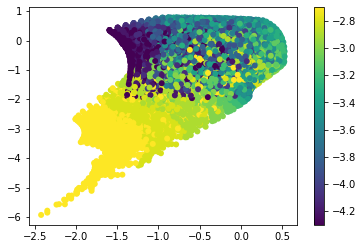

In [35]:
plt.scatter(res['n2'], res['o3'], c=res['O'], edgecolor='None')
plt.colorbar()

In [36]:
res

,n2,o3,O
0,-0.744896,-0.370397,-4.2
1,-0.560283,-0.826305,-4.2
2,-0.732859,-1.576136,-4.0
3,-0.464663,-0.595461,-4.3
4,-0.712564,0.076369,-4.0
...,...,...,...
41322,-0.712960,-0.170595,-3.3
41323,-0.502511,0.284931,-3.1
41324,-0.619735,-0.316811,-2.7
41325,-0.793884,-1.177762,-3.0


### More on databases, astronomy, SQL and python:

* AstroBetter: a very usefull blog, this post is on CDS and Python: https://www.astrobetter.com/blog/2020/07/06/the-cds-and-python-iv-simbad-the-yellow-pages-of-astronomical-sources/

* ADQL: Astronomy Data Query Language: 
 * IVOA reference document: https://www.ivoa.net/documents/ADQL/20180112/PR-ADQL-2.1-20180112.html
 * Man page on CDS: http://tapvizier.u-strasbg.fr/adql/help.html
 * ADQL cookbook on Gaia server: https://www.gaia.ac.uk/data/gaia-data-release-1/adql-cookbook


* Virtual Observatory : 
 * Cone search: http://voservices.net/spectrum/search_form_cone.aspx
 * SQL interface: http://voservices.net/spectrum/search_form_sql.aspx


* SciServer (needs an account): 
 * Main page: https://www.sciserver.org/
 * Dashboard: https://apps.sciserver.org/dashboard/
 * Introduction to CasJobs: https://skyserver.sdss.org/CasJobs/Guide.aspx
 * Example of Skyquery: http://www.voservices.net/skyquery/Assets/Query/Examples/00_index.aspx
 * Using Python : https://github.com/sciserver/SciScript-Python
 * Example using ython: https://github.com/sciserver/SciScript-Python/blob/master/Examples/Examples_SciScript-Python.ipynb


* An enhanced command line SQL interpreter client for astronomical surveys: https://github.com/mgckind/easyaccess